# 0. Supahcoolsoft employee data


## a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/supahcoolsoft.csv")
df.head()


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   98 non-null     object 
 5   Position     99 non-null     object 
 6   Salary_SEK   99 non-null     float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [3]:
df.shape

(100, 9)

In [4]:
df.describe()

,Age,Salary_SEK
count,100.000000,99.000000
mean,43.430000,52049.181818
std,10.032528,10993.553359
min,25.000000,30452.000000
25%,35.000000,43179.000000
50%,42.500000,52919.000000
75%,52.000000,60942.000000
max,60.000000,69742.000000


In [5]:
df.isnull().sum()

EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

<Axes: xlabel='Age', ylabel='Salary_SEK'>

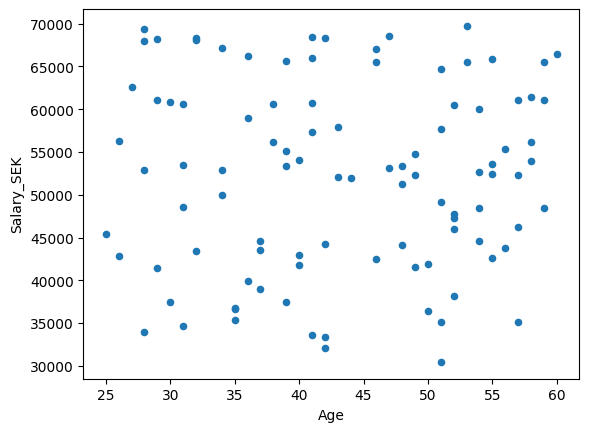

In [6]:
df.plot(x = "Age" , y= "Salary_SEK" , kind= "scatter" )

## b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

In [7]:
df.isnull().sum()

EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

In [8]:
# Department column is missing values in two rows and is filled with Unknown

df["Department"] = df["Department"].fillna('Unknown')

In [9]:
# Position column is missing values in one row and is filled with Unknown

df["Position"] = df["Position"].fillna('Unknown')

In [10]:
# To convert any non numeric data in column to nan 

df["Salary_SEK"] = pd.to_numeric(df["Salary_SEK"] , errors='coerce')

In [11]:
# Salary column is missing values in one row and is filled with mean

df["Salary_SEK"] = df["Salary_SEK"].fillna(df["Salary_SEK"].mean())

In [12]:
df.isnull().sum()


EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     0
Position       0
Salary_SEK     0
Email          0
PhoneNumber    0
dtype: int64

## c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

In [13]:
# Mean of salary culoumn

df_mean_salary = df["Salary_SEK"].mean()
df_mean_salary

np.float64(52049.181818181816)

In [14]:
# Median of salary column 

df_median_salary = df["Salary_SEK"].median()
df_median_salary

np.float64(52787.0)

In [15]:
# Min values in salary colummn

df_min_salary = df["Salary_SEK"].min()
df_min_salary

np.float64(30452.0)

In [16]:
# Max values in salary column 

df_max_salary = df["Salary_SEK"].max()
df_max_salary

np.float64(69742.0)

In [17]:
# 10 Percentile for the salary column 

percentile_10 = np.percentile(df["Salary_SEK"] , 10)
percentile_10


np.float64(36563.8)

In [18]:
# 90 Percentile for the salary column

percentile_90 = np.percentile(df["Salary_SEK"] , 90)
percentile_90

np.float64(67012.7)

##  d) Group by different roles and take the median and average salaries for each group.



In [19]:
# Get the median for all different postion salary in group form. 

df_position = df["Position"].unique()

median_group_salary = df.groupby("Position") ["Salary_SEK"].median()

median_group_salary

Position
AI Specialist                60777.0
BI Developer                 48608.5
Big Data Engineer            57958.0
Data Architect               60572.0
Data Scientist               51919.0
Database Administrator       48482.0
ETL Developer                44192.0
Junior Data Analyst          34877.5
Junior Data Engineer         41905.0
Junior Data Scientist        43595.5
Machine Learning Engineer    51806.0
Senior Data Analyst          57114.5
Senior Data Engineer         65740.0
Senior Data Scientist        65526.0
Unknown                      52931.0
Name: Salary_SEK, dtype: float64

In [20]:
# Get the averiage / mean for all different position salary in group form.

mean_avrage_groupl_salary = df.groupby("Position")["Salary_SEK"].mean()
mean_avrage_groupl_salary

Position
AI Specialist                61113.020202
BI Developer                 48276.000000
Big Data Engineer            57958.000000
Data Architect               59525.600000
Data Scientist               51722.333333
Database Administrator       47706.800000
ETL Developer                45239.111111
Junior Data Analyst          35195.300000
Junior Data Engineer         40000.200000
Junior Data Scientist        43813.125000
Machine Learning Engineer    53161.875000
Senior Data Analyst          58586.800000
Senior Data Engineer         64918.750000
Senior Data Scientist        64451.857143
Unknown                      52931.000000
Name: Salary_SEK, dtype: float64

##   e) Group by different departments and take the median and average salaries for each group.

In [21]:
# Get the median for all different Department salary in group form. 

df_department = df["Department"].unique()

median_depar_salary = df.groupby("Department")["Salary_SEK"].median()
median_depar_salary

Department
Data Science          47256.5
DevOps                48816.0
Engineering           48507.5
IT                    53193.0
Product Management    53772.0
Unknown               57437.5
Name: Salary_SEK, dtype: float64

In [22]:
# Get the averiage / mean for all different Department salary in group form.

mean_avrage_depar_salary = df.groupby("Department")["Salary_SEK"].mean()
mean_avrage_depar_salary

Department
Data Science          50978.625000
DevOps                51093.309091
Engineering           48424.600000
IT                    53585.062500
Product Management    54871.769231
Unknown               57437.500000
Name: Salary_SEK, dtype: float64

##   f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.

In [23]:
df["Department"].unique()

array(['Product Management', 'Engineering', 'DevOps', 'IT',
       'Data Science', 'Unknown'], dtype=object)

In [24]:
df_depart = df[df["Department"].isin(["Engineering", "DevOps", "IT", "Data Science"])]
df_depart


#df_depart.plot(x = "Department" , y = "Salary_SEK" , kind= 'bar')

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
5,E006,Liam,Wilson,41,IT,Senior Data Analyst,65993.0,liam.wilson@supacoolsoft.se,026-27 51 40
6,E007,Olivia,Brown,46,DevOps,AI Specialist,66996.0,olivia.brown@supacoolsoft.se,0717-03 48 64
7,E008,Astrid,Persson,50,Data Science,Data Scientist,36364.0,astrid.persson@supacoolsoft.se,08-025 34 57
...,...,...,...,...,...,...,...,...,...
92,E093,Mia,Patel,42,IT,Junior Data Analyst,33401.0,mia.patel@supacoolsoft.se,083-946 68 56
93,E094,Fatima,Khan,35,IT,Junior Data Analyst,36776.0,fatima.khan@supacoolsoft.se,007-70 46 39
95,E096,Erik,Höglund,55,Data Science,Junior Data Engineer,42590.0,erik.höglund@supacoolsoft.se,+46 (0)8 454 503 87
96,E097,Fatima,Khan,26,Engineering,BI Developer,42809.0,fatima.khan@supacoolsoft.se,08-677 430 60


In [25]:
df__ = df_depart.groupby("Department")["Salary_SEK"]
print(df__)

Department
Data Science    Axes(0.125,0.11;0.775x0.77)
DevOps          Axes(0.125,0.11;0.775x0.77)
Engineering     Axes(0.125,0.11;0.775x0.77)
IT              Axes(0.125,0.11;0.775x0.77)
Name: Salary_SEK, dtype: object

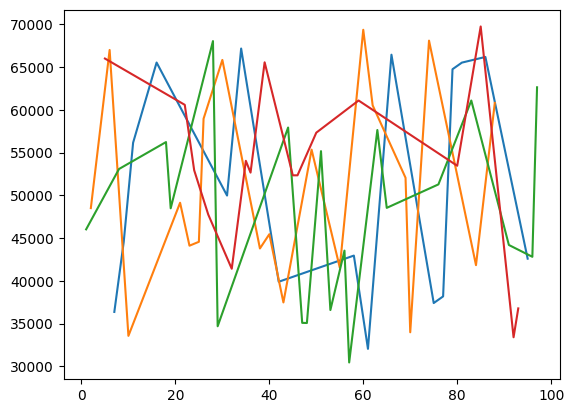

In [26]:
df__.plot(x= "Department" , y= "Salary_SEK" , kind= 'line')

## g) You are getting interview to this company as a junior data analyst, and you have this dataset. Find out some statistical information about that role and similar role to make a case on what salary you should have.

In [27]:
selected_df = df[["Position" , "Salary_SEK"]]
selected_df

,Position,Salary_SEK
0,AI Specialist,60777.0
1,Database Administrator,46020.0
2,Data Scientist,48503.0
3,Junior Data Scientist,47296.0
4,Junior Data Scientist,42435.0
...,...,...
95,Junior Data Engineer,42590.0
96,BI Developer,42809.0
97,Senior Data Engineer,62630.0
98,Senior Data Analyst,52075.0


In [28]:
JDA_  = df[df["Position"] == 'Junior Data Analyst']
JDA_

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
29,E030,Sophia,Martinez,31,Engineering,Junior Data Analyst,34687.0,sophia.martinez@supacoolsoft.se,+46 (0)763 808 28
42,E043,Maria,Larsson,36,Data Science,Junior Data Analyst,39892.0,maria.larsson@supacoolsoft.se,0074-48 00 68
43,E044,John,Doe,39,DevOps,Junior Data Analyst,37471.0,john.doe@supacoolsoft.se,08-333 15 33
48,E049,Noah,Lee,51,Engineering,Junior Data Analyst,35068.0,noah.lee@supacoolsoft.se,+46 (0)8 117 411 30
57,E058,Noah,Lee,51,Engineering,Junior Data Analyst,30452.0,noah.lee@supacoolsoft.se,091-90 11 20
61,E062,Sten,Olsson,42,Data Science,Junior Data Analyst,32045.0,sten.olsson@supacoolsoft.se,0607-67 04 63
70,E071,Henrik,Gustafsson,28,DevOps,Junior Data Analyst,33983.0,henrik.gustafsson@supacoolsoft.se,0719-21 04 29
77,E078,Åke,Karlsson,52,Data Science,Junior Data Analyst,38178.0,åke.karlsson@supacoolsoft.se,+46 (0)8 668 664 03
92,E093,Mia,Patel,42,IT,Junior Data Analyst,33401.0,mia.patel@supacoolsoft.se,083-946 68 56
93,E094,Fatima,Khan,35,IT,Junior Data Analyst,36776.0,fatima.khan@supacoolsoft.se,007-70 46 39


    
        - According to my analaystion i would have salary between 32000 to 35000 SEK.

# 1. Olympic games in Paris 2024


### Here is the wikipedia page for olympic games in paris 2024. We will use it for some data analysis. We'll use pandas pd.read_html() to scrape different tables in this site.

In [29]:
import pandas as pd


url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"


df_list = pd.read_html(url)

print(f"The number of table in the dataframe {len(df_list)}")

for i, table in enumerate(df_list):
    print(f"\nTable {i}")
    print(table.head())  # Shows the first 5 rows
    print(table.columns)  




The number of table in the dataframe 27

Table 0
                                    0  \
0  Emblem of the 2024 Summer Olympics   
1                            Location   
2                               Motto   
3                             Nations   
4                            Athletes   

                                                   1  
0                 Emblem of the 2024 Summer Olympics  
1                                      Paris, France  
2  Games Wide Open (French: Ouvrons Grand les Jeu...  
3              204 (including the AIN and EOR teams)  
4                                              10714  
Index([0, 1], dtype='int64')

Table 1
                                                   0
0                                Part of a series on
1                               2024 Summer Olympics
2  Bid process (bid details) Development (venues,...
3                                                vte
Index([0], dtype='int64')

Table 2
          City         Nation       

In [30]:
df_olympics_combined = pd.concat(df_list, ignore_index=True)

In [31]:
df_olympics_combined.head()

,0,1,City,Nation,Votes,Venue,Events,Capacity,Status,Ref.,...,Youth Olympic Games.2,vteQualification for the 2024 Summer Olympics,vteQualification for the 2024 Summer Olympics.1,"vteNational Olympic Committees at the 2024 Summer Olympics in Paris, France","vteNational Olympic Committees at the 2024 Summer Olympics in Paris, France.1","vteEvents at the 2024 Summer Olympics (Paris, France)","vteEvents at the 2024 Summer Olympics (Paris, France).1",vte Venues of the 2024 Summer Olympics (Paris),vte Venues of the 2024 Summer Olympics (Paris).1,vte Venues of the 2024 Summer Olympics (Paris).2
0,Emblem of the 2024 Summer Olympics,Emblem of the 2024 Summer Olympics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Location,"Paris, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Motto,Games Wide Open (French: Ouvrons Grand les Jeu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nations,204 (including the AIN and EOR teams),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Athletes,10714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##   a) How many sports are represented in total?


In [32]:
df_list[25]

,"vteEvents at the 2024 Summer Olympics (Paris, France)","vteEvents at the 2024 Summer Olympics (Paris, France).1"
0,Archery Artistic swimming Athletics Badminton ...,Archery Artistic swimming Athletics Badminton ...
1,Chronological summary Medal table List of meda...,Chronological summary Medal table List of meda...


##   b) Make a bar chart over the top five countries in medal count.


In [33]:
medal_list = df_list[12]

In [34]:
top_5_total_medals = medal_list.head(5)
top_5_total_medals

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64


<Axes: xlabel='NOC'>

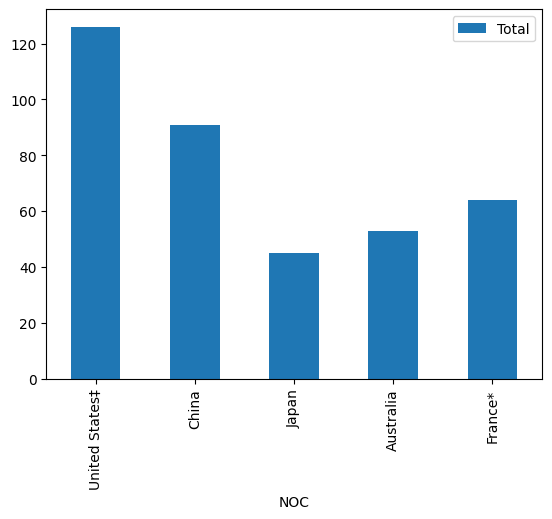

In [35]:
top_5_total_medals.plot(x= "NOC" , y= "Total" , kind="bar" )

##   c) Make a bar chart over the top five countries in gold medal count.



In [36]:
medal_list = df_list[12]

top_5_Gold_medal = medal_list.head(5)
top_5_Gold_medal

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64


<Axes: xlabel='NOC'>

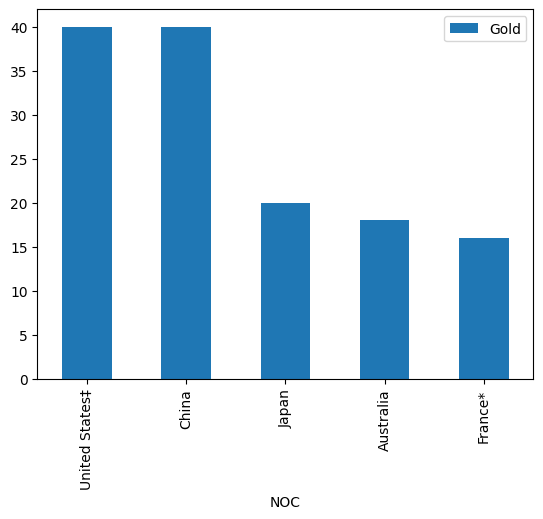

In [37]:
top_5_Gold_medal.plot(x="NOC" , y= "Gold" , kind="bar")

##  d) Choose a sport from and and make a bar chart over top five countries.

In [39]:
table_25  =df_list[25]

In [41]:
table_25.columns

Index(['vteEvents at the 2024 Summer Olympics (Paris, France)', 'vteEvents at the 2024 Summer Olympics (Paris, France).1'], dtype='object')

In [45]:
selected_colummn = table_25["vteEvents at the 2024 Summer Olympics (Paris, France)"]
print(selected_colummn)

0    Archery Artistic swimming Athletics Badminton ...
1    Chronological summary Medal table List of meda...
Name: vteEvents at the 2024 Summer Olympics (Paris, France), dtype: object


In [46]:
column1 = table_25['vteEvents at the 2024 Summer Olympics (Paris, France)']

colummn2 = table_25['vteEvents at the 2024 Summer Olympics (Paris, France).1']


print(column1)
print(colummn2)

0    Archery Artistic swimming Athletics Badminton ...
1    Chronological summary Medal table List of meda...
Name: vteEvents at the 2024 Summer Olympics (Paris, France), dtype: object
0    Archery Artistic swimming Athletics Badminton ...
1    Chronological summary Medal table List of meda...
Name: vteEvents at the 2024 Summer Olympics (Paris, France).1, dtype: object


In [47]:
# Split the strings in the first column by space or any other delimiter
sports_list_1 = table_25['vteEvents at the 2024 Summer Olympics (Paris, France)'][0].split()
sports_list_2 = table_25['vteEvents at the 2024 Summer Olympics (Paris, France).1'][0].split()

# Display the split lists
print(sports_list_1)
print(sports_list_2)


['Archery', 'Artistic', 'swimming', 'Athletics', 'Badminton', 'Basketball', 'Boxing', 'Breaking', 'Canoeing', 'Cycling', 'Diving', 'Equestrian', 'Fencing', 'Field', 'hockey', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Judo', 'Modern', 'pentathlon', 'Rowing', 'Rugby', 'sevens', 'Sailing', 'Shooting', 'Skateboarding', 'Sport', 'climbing', 'Surfing', 'Swimming', 'Table', 'tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball', 'Water', 'polo', 'Weightlifting', 'Wrestling']
['Archery', 'Artistic', 'swimming', 'Athletics', 'Badminton', 'Basketball', 'Boxing', 'Breaking', 'Canoeing', 'Cycling', 'Diving', 'Equestrian', 'Fencing', 'Field', 'hockey', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Judo', 'Modern', 'pentathlon', 'Rowing', 'Rugby', 'sevens', 'Sailing', 'Shooting', 'Skateboarding', 'Sport', 'climbing', 'Surfing', 'Swimming', 'Table', 'tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball', 'Water', 'polo', 'Weightlifting', 'Wrestling']


##   e) How many venues are there in total?

In [95]:
concate_tbale = pd.concat([df_list[3]['Venue'], df_list[4]['Venue'], df_list[5]['Venue'], df_list[5]['Venue'], df_list[5]['Venue']])

total_venue = concate_tbale.unique()

len(total_venue)



23

##   f) How many venues were built for the games?



In [127]:
concate_builtforgame = pd.concat([df_list[3][['Venue','Status']], df_list[7][['Venue' , 'Status']]])

build_for_game = concate_builtforgame['Venue'].unique()

len(build_for_game)

16

##   g) How much capacity does this correspond to?



# 3. Theory questions


##  a) When should you use median over mean in statistics?

- The reason to use Median over mean which is depend on datset

- In satuation like salary in company like 10 emoplye is getting xyz salary in this satuation we will select Median to get the middle values istead of mean , which add all employee salary and divide by number of employee , which the high value will come , which will be not relaistic 


##   b) Salary for 90th percentile is 40000, what does this mean?

- This mean that 90 percent employee in the department or company gets less than 40000 in salary and just 10 percent get more than 40000. 

##   c) What are the main data structures used in pandas, and what are their primary use cases?

- In Pandas the mian data structre used are Series and DataFrame 

    - Series is one dimentional or you can call it single row/column data 

    - Dataframe is multi diementional or with rows and column data. 

- Primary use Cases 



